In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import vega_datasets

## 1. Resample by the day and take the average temperature. Visualize the average temperature over time.


In [12]:
df = vega_datasets.data.sf_temps()
df

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [14]:
pd.to_datetime('2010-01-01 19-PM', format='%Y-%m-%d %H-%p')

Timestamp('2010-01-01 19:00:00')

In [15]:
df.date = pd.to_datetime(df.date, format='%Y-%m-%d %H-%p')

In [16]:
#setting date as index
df = df.set_index('date')
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


<AxesSubplot:title={'center':'avg_daily'}, xlabel='date'>

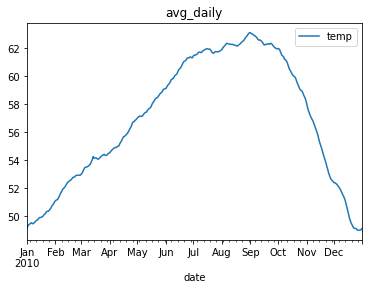

In [39]:
df.resample("D").mean().plot( title = "avg_daily")

<AxesSubplot:xlabel='date'>

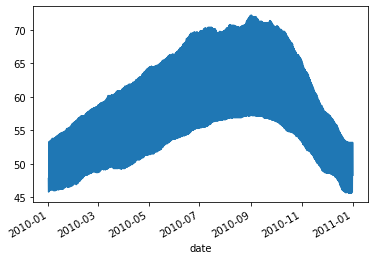

In [18]:
df.temp.plot()

## 2. Write the code necessary to visualize the minimum temperature over time.


In [20]:
df.index.day_name()

Index(['Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday',
       'Friday', 'Friday', 'Friday',
       ...
       'Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday',
       'Friday', 'Friday', 'Friday'],
      dtype='object', name='date', length=8759)

In [21]:
df["weekday_name"] = df.index.day_name()

In [22]:
df

,temp,weekday_name
date,,
2010-01-01 00:00:00,47.8,Friday
2010-01-01 01:00:00,47.4,Friday
2010-01-01 02:00:00,46.9,Friday
2010-01-01 03:00:00,46.5,Friday
2010-01-01 04:00:00,46.0,Friday
...,...,...
2010-12-31 19:00:00,50.4,Friday
2010-12-31 20:00:00,49.9,Friday
2010-12-31 21:00:00,49.4,Friday


<AxesSubplot:xlabel='weekday_name'>

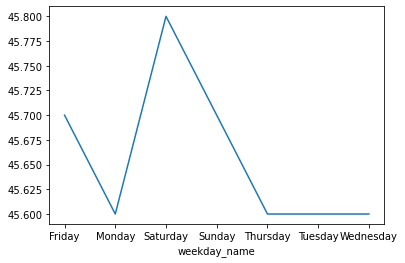

In [24]:
df.groupby('weekday_name').min().temp.plot()



## 3. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='weekday_name'>

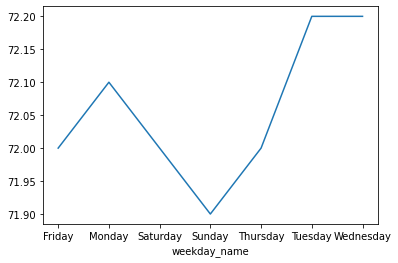

In [25]:
df.groupby('weekday_name').max().temp.plot()


## 4.Which month is the coldest, on average?


In [29]:
# aliasing by month 
df["month_name"] = df.index.month_name()
by_month = df.asfreq('M')
by_month.head()

,temp,weekday_name,month_name
date,,,
2010-01-31,49.4,Sunday,January
2010-02-28,51.0,Sunday,February
2010-03-31,51.4,Wednesday,March
2010-04-30,53.0,Friday,April
2010-05-31,55.0,Monday,May


In [30]:
by_month.min()

temp              47.7
weekday_name    Friday
month_name       April
dtype: object

## 5. Which month has the highest average temperature?


In [31]:
by_month.max()

temp                 58.8
weekday_name    Wednesday
month_name      September
dtype: object

## 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?


# seattle

In [34]:
from vega_datasets import data
sw_df = data.seattle_weather()
sw_df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [35]:
pd.to_datetime('2012-01-01', format='%Y-%m-%d')

Timestamp('2012-01-01 00:00:00')

In [37]:
sw_df.date = pd.to_datetime(sw_df.date, format='%Y-%m-%d' )

0      2012-01-01
1      2012-01-02
2      2012-01-03
3      2012-01-04
4      2012-01-05
          ...    
1456   2015-12-27
1457   2015-12-28
1458   2015-12-29
1459   2015-12-30
1460   2015-12-31
Name: date, Length: 1461, dtype: datetime64[ns]

In [38]:
sw_df = sw_df.set_index('date')
sw_df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
